# In this notebook , we perfrom some ML algorithms to predict results.

In [1]:
#importing necessary libraries

import sklearn as sks
import pandas as pd
import warnings
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2


In [2]:
#reading dataset
df=pd.read_csv('/Users/bibekrai/workspace/Nepal-Livestock-Analysis/Data Analysis/test_data.csv')

In [3]:
df=df.drop(columns='Unnamed: 0')

# Performing K means clustering of different livestocks

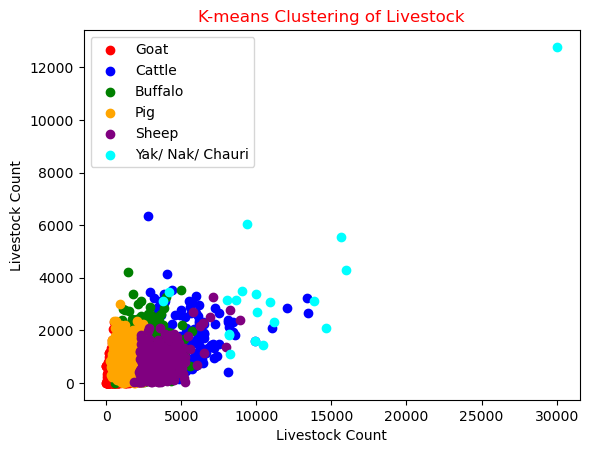

In [4]:
# importing libraries 
from sklearn.cluster import KMeans

#choosing variables
X = df.iloc[:, 2:].values

#labeling the values for legend
mylabels = ['Goat', 'Cattle', 'Buffalo', 'Pig', 'Sheep', 'Yak/ Nak/ Chauri']

#initializing variable for K means clustering
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

df['Cluster'] = labels

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']

for i in range(k):
    cluster_data = X[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label=mylabels[i])

#ploting graph 
plt.xlabel('Livestock Count')
plt.ylabel('Livestock Count')
plt.title('K-means Clustering of Livestock',color='red')
plt.legend()
plt.show()


**Observation: All livestock data are congested at one place but YAK/NAK/CHAURI and Cattle data are uniformly distributed.**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load the dataset


# Define the classes based on livestock count thresholds
df['Livestock_Category'] = pd.cut(df['Cattle'], bins=[0, 1000, 2000, float('inf')], labels=['Low Livestock', 'Medium Livestock', 'High Livestock'])

# Select the features and target variable
features = ['Cattle', 'Buffalo', 'Yak/ Nak/ Chauri', 'Sheep', 'Goat', 'Pig']
target = 'Livestock_Category'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classification model
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_logreg = logreg.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Evaluate the model performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Accuracy - Logistic Regression:", accuracy_logreg)
print("Accuracy - Decision Tree:", accuracy_dt)
print("Accuracy - Random Forest:", accuracy_rf)
print("Accuracy - Gradient Boosting:", accuracy_gb)


Accuracy - Logistic Regression: 0.5571658615136876
Accuracy - Decision Tree: 1.0
Accuracy - Random Forest: 1.0
Accuracy - Gradient Boosting: 1.0


In [9]:
# Create a new dataframe for prediction
new_data = pd.DataFrame({'Cattle': [50], 'Buffalo': [200], 'Yak/ Nak/ Chauri': [510], 'Sheep': [700], 'Goat': [420], 'Pig': [100]})

# Make predictions on the trained models
prediction_logreg = logreg.predict(new_data)
prediction_dt = dt.predict(new_data)
prediction_rf = rf.predict(new_data)
prediction_gb = gb.predict(new_data)

# Print the predictions
print("Prediction - Logistic Regression:", prediction_logreg[0])
print("Prediction - Decision Tree:", prediction_dt[0])
print("Prediction - Random Forest:", prediction_rf[0])
print("Prediction - Gradient Boosting:", prediction_gb[0])


Prediction - Logistic Regression: Low Livestock
Prediction - Decision Tree: Low Livestock
Prediction - Random Forest: Low Livestock
Prediction - Gradient Boosting: Low Livestock
